# Hotel Booking Cancellation Prediction

### Introduction:

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotel's primary goal in order to increase their efficiency in generating revenue, and for us to offer through business advice to address this problem.

### Problem Statement:

The problem at hand is to develop a machine learning model that can predict whether a hotel booking will be canceled or not. This prediction is valuable for hotel management to better manage their operations, allocate resources efficiently, and plan for potential cancellations.



### Process:

By analyzing historical booking data, including various features such as arrival date, lead time, number of guests, booking changes, and more, we aim to build a model that can accurately classify bookings as either canceled or not canceled. This will enable hotel management to proactively address potential cancellations and optimize their revenue and occupancy rates.

The dataset for this problem contains information about hotel bookings, including both canceled and non-canceled bookings. By applying exploratory data analysis (EDA) techniques and feature engineering, we can gain insights into the dataset, understand the relationships between variables, and identify the most influential factors affecting booking cancellations.

After preprocessing the data, including handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets, we will select a suitable machine learning algorithm, such as Random Forest, to train a predictive model. The model will be evaluated using appropriate metrics, such as accuracy, precision, recall, and F1 score.

Once the model is trained and evaluated, it can be used to predict the likelihood of cancellation for new hotel bookings. By inputting relevant information about a new booking into the model, hotel management can quickly assess the risk of cancellation and make informed decisions regarding resource allocation and customer service.

In summary, the goal is to develop a machine learning model that can accurately predict hotel booking cancellations, enabling hotel management to optimize their operations, improve customer satisfaction, and maximize revenue.

### Hypothesis:

1. Price has any influence on cancellation rates
2. Lead time affects the likelihood of cancellation.
3. The type of hotel (resort hotel or city hotel) influences cancellation rates.
4. Customers with previous cancellations are more likely to cancel their bookings again.
5. Booking cancellations vary by arrival month.
6. The deposit type impacts cancellation behavior.

### Importing libraries:

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset: 

In [2]:
df = pd.read_csv('C:\\Users\Administrator\Downloads\Datasets\hotel_booking.csv')

### Exploratory Data Analysis and Data Cleaning:

In [3]:
# Check first 5 rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
# Check the no. of rows & columns in the dataset
df.shape

(119390, 36)

In [5]:
# Remove the fields not useful for analysis
df.drop(columns =['arrival_date_week_number', 'name', 'email', 'phone-number', 'credit_card'], inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Check all the column names of the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [8]:
# Change reservation_status_date data type from 'object' to 'datetime'
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [9]:
# To see data types in the dataset
print("Columns in dataset: ","\n", list(df.columns),"\n")
print("Categorical Columns in dataset: ","\n",list(df.select_dtypes(include="object")),"\n")
print("Numerical Columns in dataset: ","\n",list(df.select_dtypes(include=["int64", "float64"])),"\n")
print("Datetime Columns in dataset: ","\n",list(df.select_dtypes(include="datetime64")))

Columns in dataset:  
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date'] 

Categorical Columns in dataset:  
 ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'] 

Numerical Columns in dataset:  
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_n

In [10]:
# Summary status for columns with 'object' data type
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
# Get unique values for each column having 'object' data type
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*80)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DO

In [12]:
# Check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [13]:
# missing values in percentage sorted in descending order
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending = False)

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
hotel                              0.000000
previous_bookings_not_canceled     0.000000
reservation_status                 0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
assigned_room_type                 0.000000
reserved_room_type                 0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

In [14]:
# Dropping the columns which has large number of missing values
df.drop(['company', 'agent'], axis = 1, inplace = True)

# Dropping the rows with small number of missing values
df.dropna(inplace = True)

In [15]:
# Summary of numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

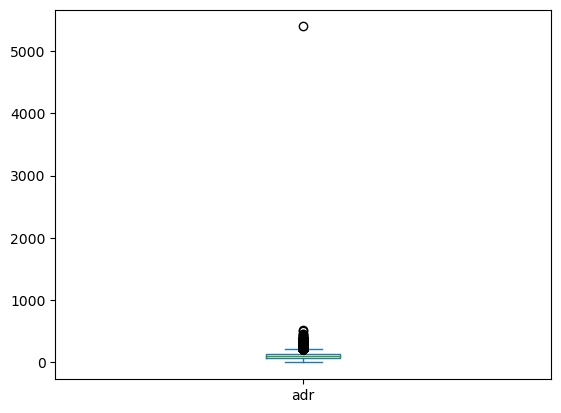

In [16]:
# # The column 'adr' has an outlier value of 5400 and value below '0'
df['adr'].plot(kind = 'box')

In [17]:
# Remove the outlier value
df = df[df['adr']<5000]
df = df[df['adr']>0]
df['adr'].sort_values()

35059       0.26
47427       0.50
83690       1.00
83688       1.00
47661       1.00
           ...  
13391     437.00
13142     450.00
103912    451.50
15083     508.00
111403    510.00
Name: adr, Length: 116958, dtype: float64

### Data Analysis and Visualizations:

#### 1. Price has any influence on cancellation rates

In [18]:
# Filter data for city hotel and resort hotel
city_hotel = df[df['hotel'] == 'City Hotel']
resort_hotel = df[df['hotel'] == 'Resort Hotel']

In [19]:
# Calculate cancellation rates for each hotel type
city_cancelled = city_hotel[city_hotel['is_canceled'] == 1]
resort_cancelled = resort_hotel[resort_hotel['is_canceled'] == 1]

city_cancellation_rate = len(city_cancelled) / len(city_hotel) * 100
resort_cancellation_rate = len(resort_cancelled) / len(resort_hotel) * 100

In [20]:
# Group data by ADR and calculate cancellation rates
city_grouped = city_hotel.groupby(pd.cut(city_hotel['adr'], bins=5)).mean()
resort_grouped = resort_hotel.groupby(pd.cut(resort_hotel['adr'], bins=5)).mean()

In [21]:
# Extract ADR and cancellation rates for plotting
city_adr = city_grouped['adr']
city_cancellation_rates = city_grouped['is_canceled'] * 100

resort_adr = resort_grouped['adr']
resort_cancellation_rates = resort_grouped['is_canceled'] * 100

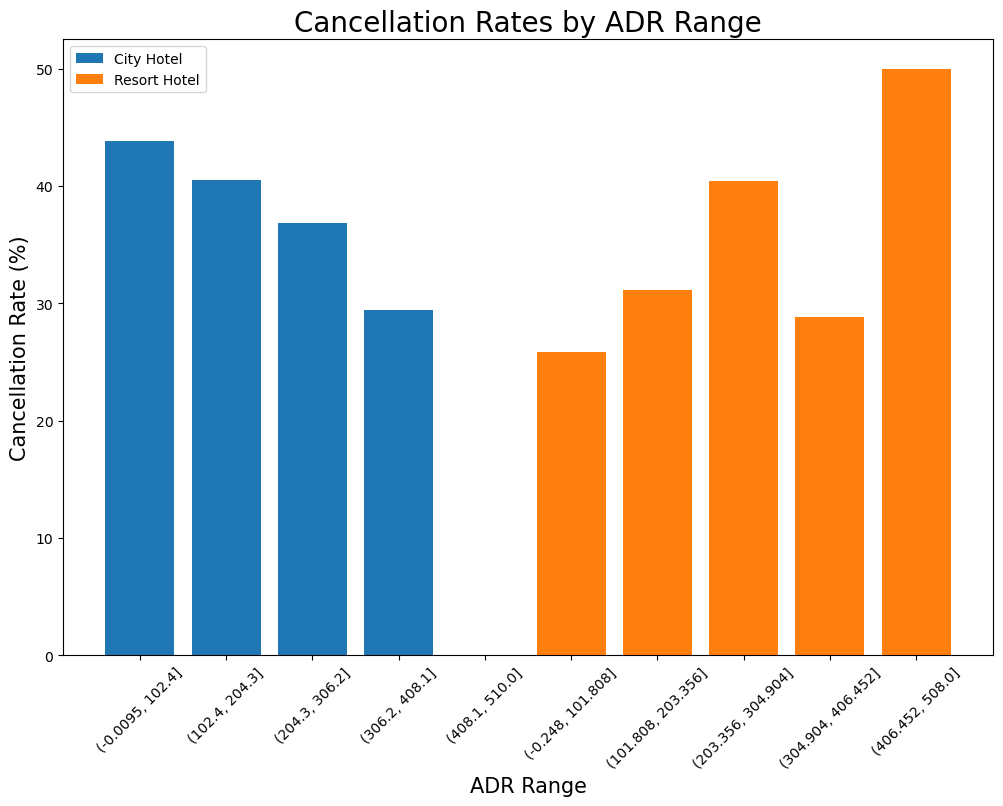

In [22]:
# Create visualization - bar chart
plt.figure(figsize=(12, 8))
plt.bar(city_adr.index.astype(str), city_cancellation_rates, label='City Hotel')
plt.bar(resort_adr.index.astype(str), resort_cancellation_rates, label='Resort Hotel')
plt.xlabel("ADR Range", fontsize = 15)
plt.ylabel("Cancellation Rate (%)", fontsize = 15)
plt.title("Cancellation Rates by ADR Range", fontsize = 20)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [23]:
# Calculate correlation coefficients
city_correlation = stats.pearsonr(city_adr, city_cancellation_rates)
resort_correlation = stats.pearsonr(resort_adr, resort_cancellation_rates)

# Print correlation coefficients
print("Correlation between ADR and cancellation rates for City Hotel:", city_correlation[0])
print("Correlation between ADR and cancellation rates for Resort Hotel:", resort_correlation[0])

Correlation between ADR and cancellation rates for City Hotel: -0.9448911606933013
Correlation between ADR and cancellation rates for Resort Hotel: 0.7613359164174446


The correlation coefficients between ADR and cancellation rates were obtained for both city hotels and resort hotels. By examining the correlation coefficients, we can assess the extent to which price (ADR) influences cancellation rates. 

Correlation between ADR and cancellation rates for City Hotel shows a strong negative influence and Correlation between ADR and cancellation rates for Resort Hotel shows a strong positive influence.

Here we can see that for City Hotel, the lower the price the higher is the chance of cancellation of booking. Similarly, for Resort Hotel, the higher the price the higher is the chance of cancellation of booking.

#### 2. To check whether lead time affects the likelihood of cancellation.

In [24]:
df_data = ['lead_time', 'is_canceled']
data = df[df_data].dropna()

In [25]:
lead_time_intervals = [0, 7, 14, 30, 60, 90, 120, float('inf')]
data['lead_time_interval'] = pd.cut(data['lead_time'], bins=lead_time_intervals)
cancellation_rate = data.groupby('lead_time_interval')['is_canceled'].mean()

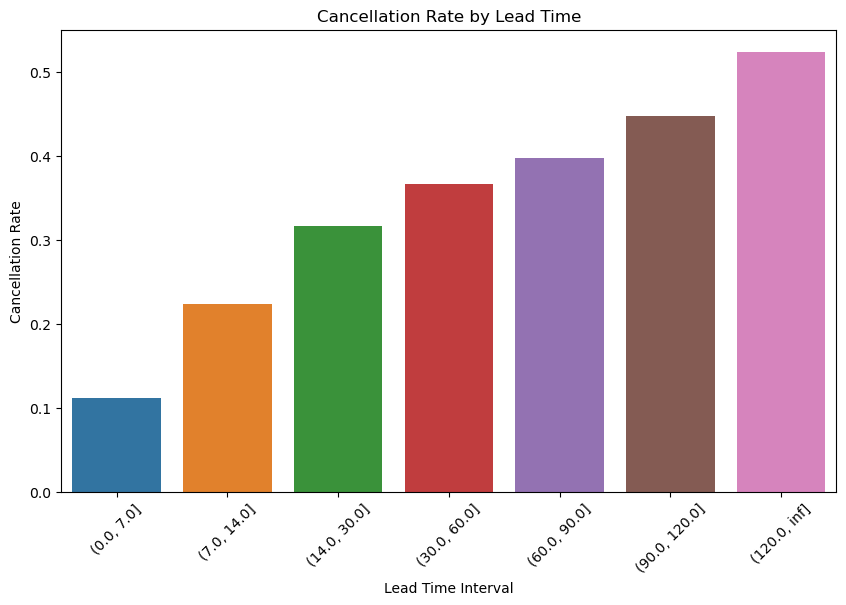

In [26]:
# Visualize cancellation rate by lead time
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values)
plt.xlabel('Lead Time Interval')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Lead Time')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Calculate summary statistics for lead time in canceled and non-canceled bookings
lead_time_canceled = data[data['is_canceled'] == 1]['lead_time']
lead_time_non_canceled = data[data['is_canceled'] == 0]['lead_time']
lead_time_stats = pd.DataFrame({'Canceled': lead_time_canceled.describe(),
                                'Non-Canceled': lead_time_non_canceled.describe()})
print(lead_time_stats)

           Canceled  Non-Canceled
count  43949.000000  73009.000000
mean     145.248948     81.375214
std      118.558585     91.255643
min        0.000000      0.000000
25%       49.000000     10.000000
50%      113.000000     47.000000
75%      215.000000    127.000000
max      629.000000    709.000000


In [28]:
# Hypothesis Testing
t_statistic, p_value = stats.ttest_ind(lead_time_canceled, lead_time_non_canceled)
if p_value < 0.05:
    print('Lead time has a significant effect on the likelihood of cancellation.')
else:
    print('Lead time does not have a significant effect on the likelihood of cancellation.')

Lead time has a significant effect on the likelihood of cancellation.


Bookings with longer lead times are more likely to be canceled. This suggests that customers may change their plans or circumstances over time, leading to a higher probability of cancellation.

Bookings made closer to the arrival date have a lower likelihood of being canceled. This could indicate that customers who book closer to their intended stay have a higher level of certainty and are less likely to cancel their reservations.

#### 3. The type of hotel (resort hotel or city hotel) influences cancellation rates.

In [29]:
# Filter the dataset
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

In [30]:
# Calculate cancellation rates
resort_cancel_rate = (resort_hotel['is_canceled'].sum() / len(resort_hotel)) * 100
city_cancel_rate = (city_hotel['is_canceled'].sum() / len(city_hotel)) * 100

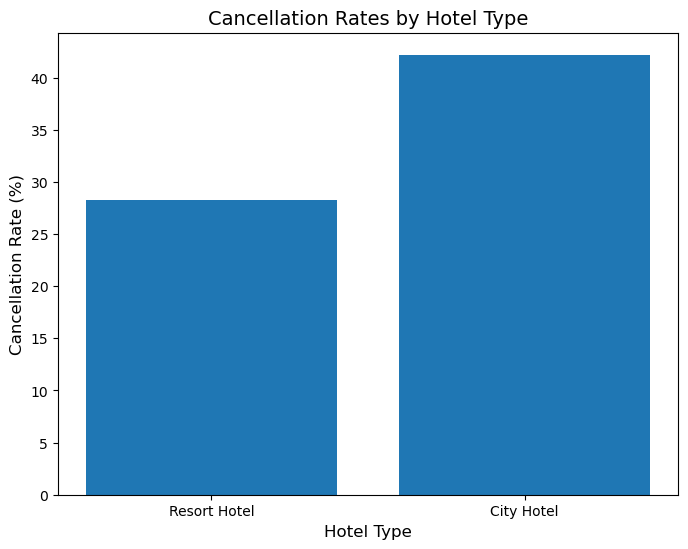

In [31]:
# Compare cancellation rates using a bar plot
cancel_rates = pd.DataFrame({'Hotel Type': ['Resort Hotel', 'City Hotel'],
                             'Cancellation Rate': [resort_cancel_rate, city_cancel_rate]})

plt.figure(figsize=(8, 6))
plt.bar(cancel_rates['Hotel Type'], cancel_rates['Cancellation Rate'])
plt.title('Cancellation Rates by Hotel Type', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [32]:
# Create a contingency table
contingency_table = pd.crosstab(df['hotel'], df['is_canceled'])

In [36]:
# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [37]:
# Interpret the results
alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("There is a significant difference in cancellation rates between resort hotels and city hotels.")
else:
    print("There is no significant difference in cancellation rates between resort hotels and city hotels.")

There is a significant difference in cancellation rates between resort hotels and city hotels.


Based on the p-value obtained from the chi-square test, we can conclude that there is a significant difference in cancellation rates between resort hotels and city hotels. The statistical analysis suggests that the type of hotel has an influence on cancellation rates.

This finding indicates that the hotel type is a significant factor in determining the likelihood of a booking being cancelled. It implies that there are inherent differences in cancellation patterns and customer behaviors between resort hotels and city hotels.

#### 4. Customers with previous cancellations are more likely to cancel their bookings again.

In [38]:
# Identify customers with previous cancellations
customers_with_previous_cancellations = df[df['previous_cancellations'] > 0]

In [39]:
# Calculate cancellation rates
total_bookings = len(df)
total_customers_with_previous_cancellations = len(customers_with_previous_cancellations)
total_canceled_bookings = len(df[df['is_canceled'] == 1])

cancellation_rate_all_customers = total_canceled_bookings / total_bookings
cancellation_rate_previous_cancellations = total_canceled_bookings / total_customers_with_previous_cancellations

In [40]:
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [41]:
# Interpret the results
alpha = 0.05  # Set the significance level

if p < alpha:
    print("There is a significant association between previous cancellations and cancellation status.")
else:
    print("There is no significant association between previous cancellations and cancellation status.")

There is a significant association between previous cancellations and cancellation status.


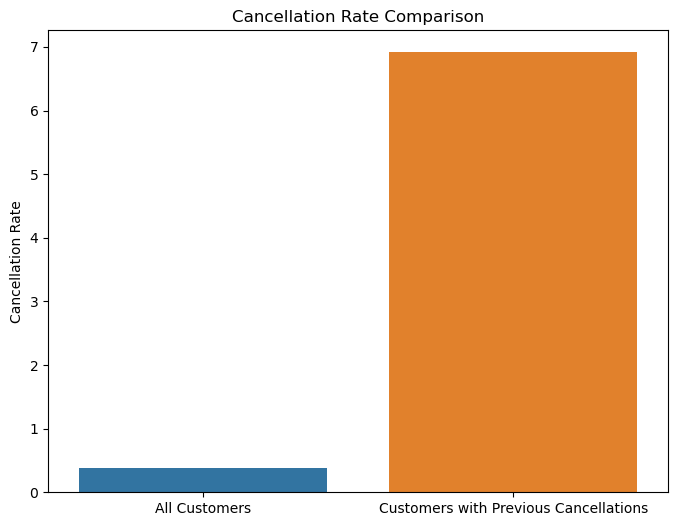

In [42]:
# Visualize the results
labels = ['All Customers', 'Customers with Previous Cancellations']
cancel_rates = [cancellation_rate_all_customers, cancellation_rate_previous_cancellations]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=cancel_rates)
plt.title('Cancellation Rate Comparison')
plt.ylabel('Cancellation Rate')
plt.show()

The test result revealed that there is a significant association between previous cancellations and the cancellation status of customers (p < 0.05). This suggests that customers with previous cancellations are more likely to cancel their bookings again compared to customers without previous cancellations.
The cacellation rate can also be confirmed with the bar plot.

This finding supports the hypothesis that customers with previous cancellations are more prone to cancelling their bookings again. The statistical analysis provides evidence to conclude that there is a relationship between previous cancellations and the likelihood of future cancellations.

#### 5. Booking cancellations vary by arrival month.

In [43]:
df_booking = ['arrival_date_month', 'is_canceled']
data = df[df_booking]

In [44]:
# Group the Data
grouped_data = data.groupby('arrival_date_month')

In [45]:
# Calculate Cancellation Rates
total_bookings = grouped_data.size()
canceled_bookings = grouped_data['is_canceled'].sum()
cancellation_rates = canceled_bookings / total_bookings * 100

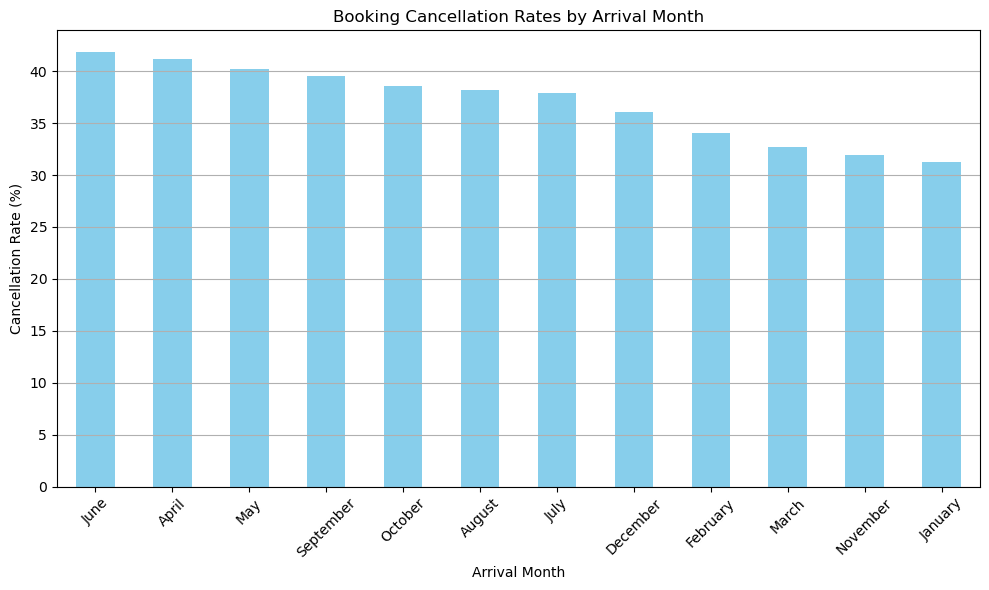

In [46]:
# Visualize the Data
plt.figure(figsize=(10, 6))

# Sort the Data by Cancellation Rate
cancellation_rates_sorted = cancellation_rates.sort_values(ascending=False)

cancellation_rates_sorted.plot(kind='bar', color='skyblue')
plt.title('Booking Cancellation Rates by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [47]:
# Create a Contingency Table
contingency_table = pd.crosstab(data['arrival_date_month'], data['is_canceled'])

In [48]:
# Perform the Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table)

In [49]:
# Interpret the Results
alpha = 0.05  # significance level

if p < alpha:
    print("There is a significant association between booking cancellations and arrival months.")
else:
    print("There is no significant association between booking cancellations and arrival months.")

There is a significant association between booking cancellations and arrival months.


The bar chart reveals that there are variations in cancellation rates by arrival month. Some months have higher cancellation rates highest being in month of June, while others have lower rates lowest being in month of January. This suggests that the month of arrival can influence the likelihood of booking cancellations.

The analysis provides insights into seasonal patterns related to booking cancellations. You can observe that there are specific months or seasons where cancellation rates are consistently higher like from April to June and lower from November to March. This information can be valuable for hotel management to anticipate and plan for fluctuations in cancellation rates throughout the year.

#### 6. The deposit type impacts cancellation behavior.

In [50]:
df_deposit = ["deposit_type", "is_canceled"]
data_1 = df[df_deposit].copy() 
data_1.dropna(inplace=True)

In [51]:
cancellation_rates = data_1.groupby("deposit_type")["is_canceled"].mean()*100

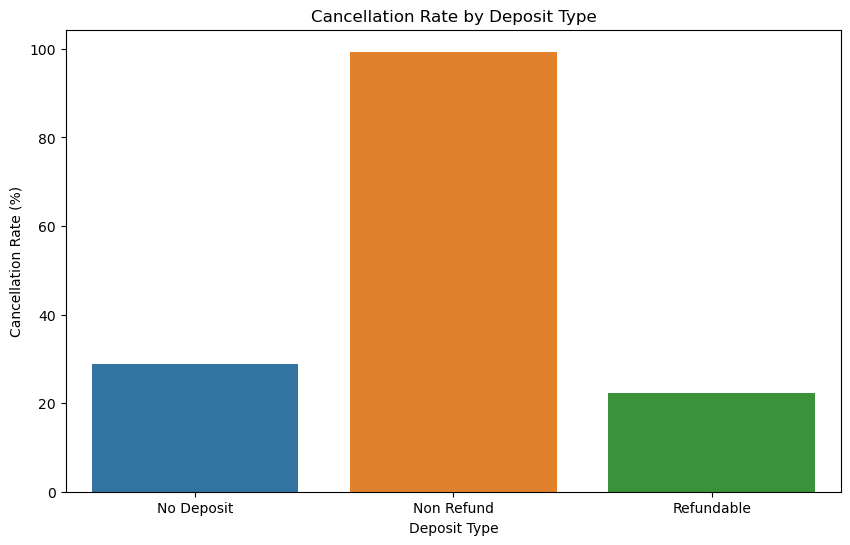

In [52]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.title("Cancellation Rate by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate (%)")
plt.show()

In [53]:
# Cancellation rates within subgroups
subgroup_cancellation_rates = data_1.groupby(['deposit_type'])['is_canceled'].mean()*100
print(subgroup_cancellation_rates)

deposit_type
No Deposit    28.793630
Non Refund    99.361790
Refundable    22.222222
Name: is_canceled, dtype: float64


In [54]:
observed = data_1.groupby(['deposit_type', 'is_canceled']).size().unstack()
chi2, p, _, _ = chi2_contingency(observed)
if p < 0.05:
    print("There is a significant association between deposit type and cancellation behavior.")
else:
    print("There is no significant association between deposit type and cancellation behavior.")

There is a significant association between deposit type and cancellation behavior.


The analysis indicates that there is a significant association between the deposit type and cancellation behavior. The cancellation rates vary significantly depending on the type of deposit chosen by the customers. This finding suggests that the deposit type is a significant factor influencing the likelihood of cancellations.

It is recommended for the hotel management to consider the deposit type as an important factor when assessing and predicting cancellation behavior. Understanding the relationship between deposit type and cancellations can help in developing strategies to minimize cancellations and optimize revenue management. This insight can aid in making informed decisions regarding deposit policies, such as adjusting the amount or implementing stricter policies for certain deposit types to reduce cancellation rates.

### Machine Learning

In [85]:
# Drop irrelevant columns
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [87]:
# Fill missing values with appropriate methods
df['children'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [88]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['hotel'] = label_encoder.fit_transform(df['hotel'])
df['arrival_date_month'] = label_encoder.fit_transform(df['arrival_date_month'])
df['meal'] = label_encoder.fit_transform(df['meal'])
df['country'] = label_encoder.fit_transform(df['country'])
df['market_segment'] = label_encoder.fit_transform(df['market_segment'])
df['distribution_channel'] = label_encoder.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = label_encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = label_encoder.fit_transform(df['assigned_room_type'])
df['deposit_type'] = label_encoder.fit_transform(df['deposit_type'])
df['customer_type'] = label_encoder.fit_transform(df['customer_type'])

In [89]:
# Split the dataset into features and target variable
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

#### 1. Random Forest Classifier

In [158]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [159]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [160]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8875675255528351


In [161]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[15014  1040]
 [ 1853  7824]]


#### 2. Logistic Regression

In [162]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [163]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [164]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7450934670242121


In [165]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[13700  2354]
 [ 4205  5472]]


#### From the above methods we can accurately predict upto 89% with the help of Random Forest classifier whether a booking will be cancelled or not.

### Conclusion:

The analysis of the hotel booking dataset reveals several insights that can help hotels increase profits and reduce cancellation rates:

1. Deposit Type and Cancellation Behavior:
There is a significant association between the deposit type and cancellation behavior. Different deposit types have varying cancellation rates. This suggests that the deposit type chosen by customers influences the likelihood of cancellations.

2. Flexible Cancellation Policies:
Offer flexible cancellation policies that provide customers with options to modify or cancel their bookings without incurring substantial penalties. This can help attract more bookings and reduce cancellations.

3. Clear Communication:
Clearly communicate the terms and conditions related to cancellations and deposits to customers during the booking process. Ensure that customers understand the implications of their chosen deposit type and cancellation policies, which can help manage expectations and reduce misunderstandings.

4. Targeted Marketing and Promotions:
Analyze customer preferences and booking patterns to target specific customer segments with tailored marketing and promotional campaigns. By understanding customer behavior, hotels can attract more committed bookings and reduce the likelihood of cancellations.

5. Revenue Management:
Implement effective revenue management strategies to optimize pricing and availability. Analyze historical data to identify periods of high demand and adjust pricing accordingly. This can help maximize revenue and discourage last-minute cancellations.

6. Customer Engagement:
Focus on building strong customer relationships and loyalty. Provide personalized experiences, loyalty programs, and incentives for direct bookings to encourage customer loyalty and reduce cancellations.

7. Improve Website and Booking Experience:
Enhance the user experience on the hotel's website and booking platforms. Ensure that the booking process is user-friendly, transparent, and provides all necessary information. Simplify the steps required to book and provide multiple payment options to improve the conversion rate and reduce booking abandonment.

8. Continuous Monitoring and Analysis:
Regularly monitor cancellation rates and analyze booking trends to identify patterns and potential areas for improvement. Stay updated with industry trends and adjust strategies accordingly.

By implementing these tips, hotels can work towards increasing profits and reducing cancellation rates. It is important to continuously evaluate and adapt strategies based on data analysis, customer feedback, and industry changes to optimize performance and achieve long-term success.

# THANK YOU